In [5]:
import pyemu
import os
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 
import pandas as pd
import matplotlib.pyplot as plt
import psutil
import shutil
import numpy as np
import sys
import matplotlib
import matplotlib.cm as cm

In [6]:
sys.path.insert(1, 'd:/spark-brc_gits/apexmf_git/')

In [7]:
from apexmf import apexmf_pst_viz
from apexmf.salt.salt_handler import SaltAnalysis
from apexmf.salt.analyzer import SaltAnalysis, SaltViz, get_stats

In [8]:
m_d = "d:/Projects/Watersheds/Animas/Analysis/AMRSs/calibration/main_ies_1_pp_rw_ies_init_zero"
pst = pyemu.Pst(os.path.join(m_d,'animas_amrs_pp_rw_ies_init_zero.pst'))

In [9]:
prior_df = pyemu.ParameterEnsemble.from_csv(pst=pst,filename=os.path.join(m_d,"animas_amrs_pp_rw_ies_init_zero.{0}.par.csv".format(0)))
post_df = pyemu.ParameterEnsemble.from_csv(pst=pst,filename=os.path.join(m_d,"animas_amrs_pp_rw_ies_init_zero.{0}.par.csv".format(9)))

# Get prior and posterior from each fold parameter sets

In [78]:
# phi data
phi_df = pd.read_csv(os.path.join(m_d, "animas_amrs_pp_rw_ies_init_zero.phi.actual.csv"))
phi_means = phi_df.loc[:, "mean"].tolist()
phi_max = phi_df.loc[:, "max"].max()
phi_min = phi_df.loc[:, "min"].min()

In [42]:
# get parameter setup
df_pars = pd.read_csv(os.path.join(m_d, "animas_amrs.par_data02_zero.csv"))
sel_pars = df_pars.loc[df_pars["partrans"]=='log']

In [51]:
phi_vals = phi_df.loc[phi_df["iteration"]==0, phi_df.columns[6:]]

In [53]:
phi_vals.T

,0
0,2205390.0
1,1963500.0
2,2056760.0
3,2051330.0
4,1971520.0
...,...
145,2267760.0
146,2537980.0
147,NaN
148,1929810.0


In [55]:
dff = pd.concat([phi_vals.T, post_df], axis=1)

In [56]:
dff

,0,aquf_caco3,aquf_caso4,aquf_mgso4,soil_caco_h,soil_caco_l,soil_caco_m,soil_caco_mh,soil_caco_ml,soil_caso_h,...,salt_so4027,salt_so4028,salt_so4029,salt_so4030,salt_so4031,salt_so4032,salt_so4033,salt_so4034,salt_so4035,salt_so4036
0,2205390.0,0.004033,0.055984,0.075837,11.45240,3.593540,0.239215,0.198437,3.739260,0.327838,...,64.3865,0.000124,45.9388,52.0456,49.846100,0.006049,145.537,407.473,6.009790,3.903790e-06
1,1963500.0,0.000165,0.056557,0.089234,10.25160,4.534450,14.286700,0.013697,1.559600,0.010279,...,46.4725,0.000265,87.4650,60.4872,66.871300,25.461400,207.766,163.140,4.643510,5.767550e-07
2,2056760.0,0.000303,0.069721,0.093750,10.40020,0.303964,13.700300,1.739780,3.756440,0.020913,...,85.7716,0.000995,18.9930,89.6630,102.824000,0.731481,228.596,324.857,0.070072,1.348730e-05
3,2051330.0,0.000460,0.087506,0.098063,11.49460,2.554720,15.470100,0.039281,0.266360,0.470384,...,68.9295,0.003602,34.4144,38.7536,234.443000,206.738000,171.918,370.281,15.581400,1.355630e-05
4,1971520.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,2267760.0,0.021722,0.104615,0.083164,3.22662,1.209430,15.391300,0.009932,0.060053,0.206266,...,48.3035,0.000002,33.5687,42.1434,0.087819,0.365904,162.142,317.119,14.519700,1.938390e-06
146,2537980.0,0.000044,0.054784,0.079976,9.55832,3.085870,16.600000,0.891690,0.490854,0.060627,...,68.7842,0.000141,57.3065,68.8498,97.709900,2.177500,132.058,390.815,66.676300,2.675870e-06
147,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
148,1929810.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
post_df

return type uncaught, losing Ensemble type, returning DataFrame


,aquf_caco3,aquf_caso4,aquf_mgso4,soil_caco_h,soil_caco_l,soil_caco_m,soil_caco_mh,soil_caco_ml,soil_caso_h,soil_caso_l,...,salt_so4027,salt_so4028,salt_so4029,salt_so4030,salt_so4031,salt_so4032,salt_so4033,salt_so4034,salt_so4035,salt_so4036
real_name,,,,,,,,,,,,,,,,,,,,,
0,0.004033,0.055984,0.075837,11.45240,3.593540,0.239215,0.198437,3.739260,0.327838,0.075017,...,64.386500,1.235560e-04,45.9388,52.0456,49.846100,0.006049,145.5370,407.473,6.009790,3.903790e-06
1,0.000165,0.056557,0.089234,10.25160,4.534450,14.286700,0.013697,1.559600,0.010279,0.071291,...,46.472500,2.648420e-04,87.4650,60.4872,66.871300,25.461400,207.7660,163.140,4.643510,5.767550e-07
2,0.000303,0.069721,0.093750,10.40020,0.303964,13.700300,1.739780,3.756440,0.020913,0.012006,...,85.771600,9.954510e-04,18.9930,89.6630,102.824000,0.731481,228.5960,324.857,0.070072,1.348730e-05
3,0.000460,0.087506,0.098063,11.49460,2.554720,15.470100,0.039281,0.266360,0.470384,0.093524,...,68.929500,3.601970e-03,34.4144,38.7536,234.443000,206.738000,171.9180,370.281,15.581400,1.355630e-05
5,0.032489,0.108905,0.093898,9.46309,2.423480,13.289300,7.888300,0.233120,0.840703,0.081932,...,69.700900,2.231490e-07,54.6255,45.5605,61.643400,10.352200,275.1290,313.463,0.106032,8.191220e-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,0.001155,0.005888,0.092644,8.60674,2.329020,13.649600,0.611982,3.981870,0.005042,0.083646,...,81.032000,1.734270e-05,32.1384,52.0150,113.230000,2.116870,104.6190,312.586,11.461400,7.644760e-06
143,0.000285,0.055313,0.082040,13.32730,2.979870,15.696900,8.304570,1.348030,0.322852,0.102245,...,0.013696,6.617330e-06,51.0638,33.4166,100.444000,45.177100,91.4529,69.718,0.040606,7.347480e-09
145,0.021722,0.104615,0.083164,3.22662,1.209430,15.391300,0.009932,0.060053,0.206266,0.069119,...,48.303500,2.465390e-06,33.5687,42.1434,0.087819,0.365904,162.1420,317.119,14.519700,1.938390e-06


In [138]:
colnams = [
    "soil_caco_h", "salt_ca033", "salt_cl025", "salt_co3011", "salt_hco3027", "salt_k002",
    "salt_mg028", "salt_na023", "salt_so4030"]

In [76]:
phi_min

922380.0

In [83]:
phi_max

2940350.0

In [ ]:
rgba_vals = []
for v in phi_vals:
    print(mapper.to_rgba(v))
    rgba_vals.append(mapper.to_rgba(v))

In [96]:

minima = phi_min
maxima = phi_max
norm = matplotlib.colors.Normalize(vmin=minima, vmax=maxima, clip=True)
mapper = cm.ScalarMappable(norm=norm, cmap=cm.rainbow)
rgba_vals = []
for v in phi_means:
    print(mapper.to_rgba(v))
    rgba_vals.append(mapper.to_rgba(v))

(0.6215686274509804, 0.9818225628535369, 0.6364742361471414, 1.0)
(0.16274509803921566, 0.5053251839489481, 0.965124085200289, 1.0)
(0.27254901960784317, 0.34972651120626114, 0.9840863373026044, 1.0)
(0.32745098039215687, 0.2677330033224679, 0.9908312530915603, 1.0)
(0.37450980392156863, 0.19584546700716696, 0.9951469164070644, 1.0)
(0.39019607843137255, 0.1716256791663596, 0.9962836527484294, 1.0)
(0.4137254901960784, 0.13510524748139296, 0.9977051801738729, 1.0)
(0.4294117647058824, 0.11065268189150083, 0.9984636039674339, 1.0)
(0.4372549019607843, 0.0984002782796427, 0.99878599219429, 1.0)
(0.4372549019607843, 0.0984002782796427, 0.99878599219429, 1.0)
(0.44509803921568625, 0.08613293949614599, 0.9990704811844932, 1.0)


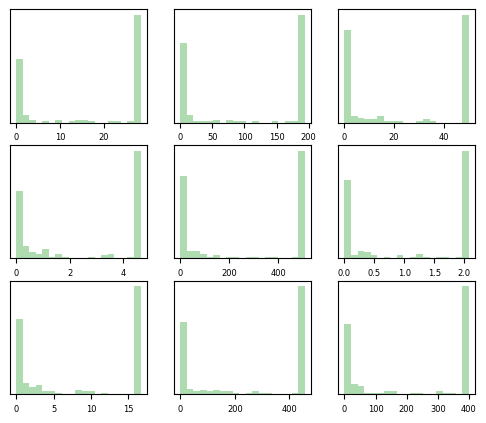

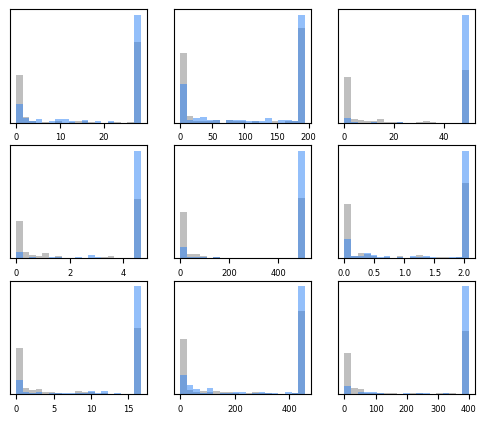

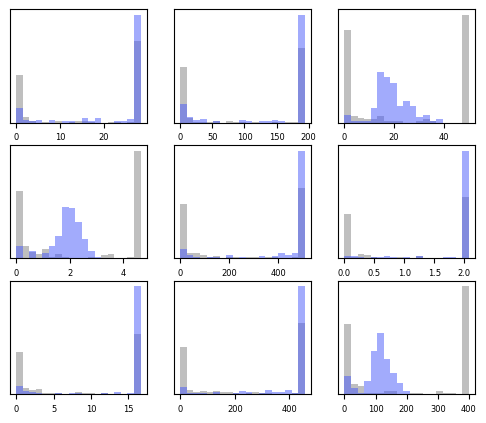

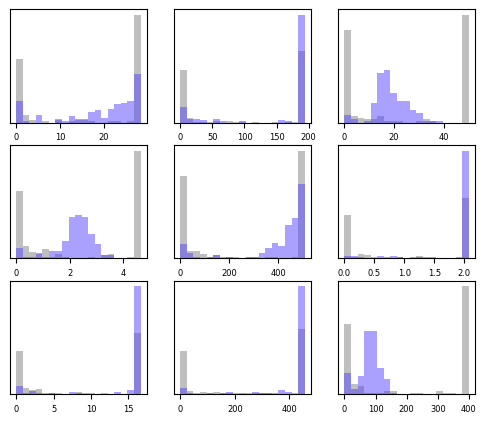

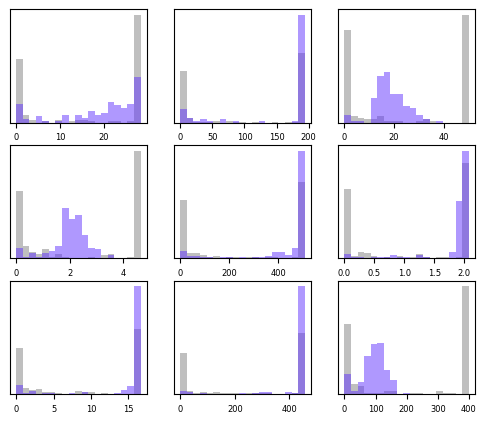

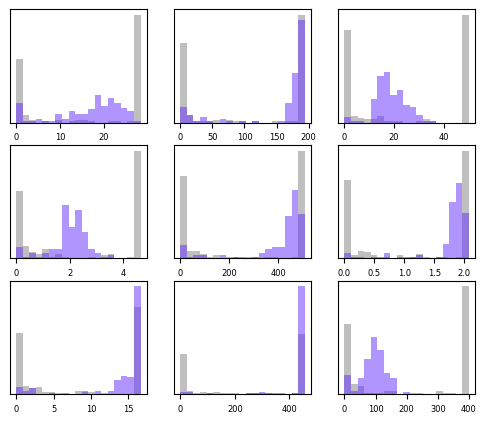

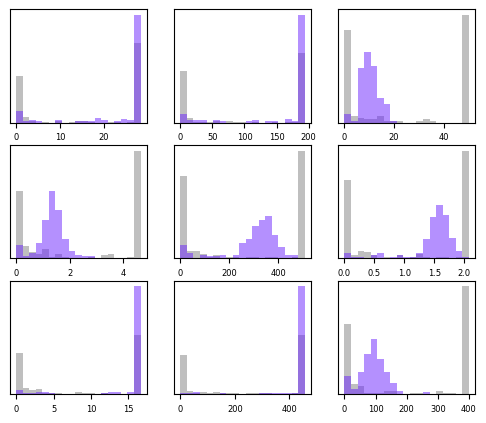

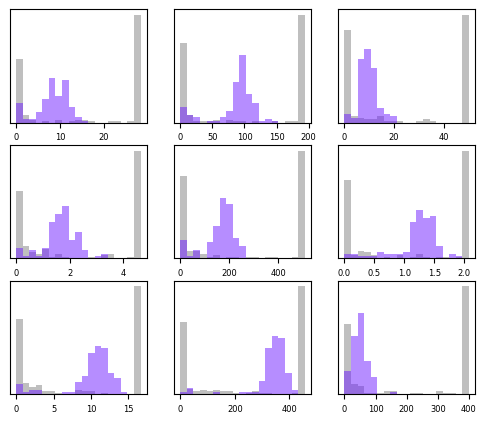

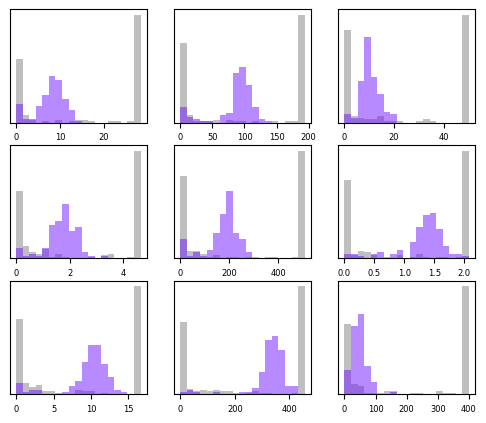

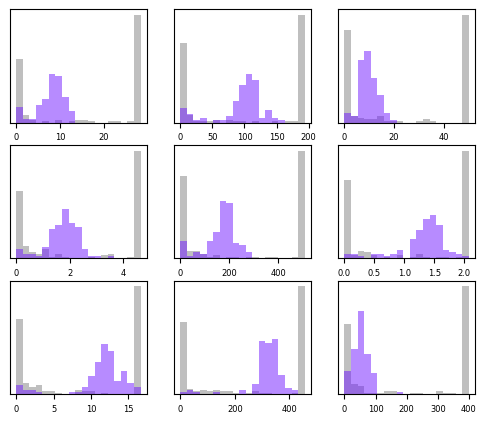

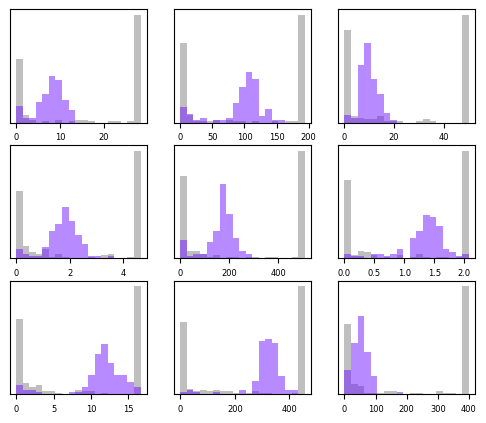

In [139]:
for fid in range(11):
    post_df = pyemu.ParameterEnsemble.from_csv(
        pst=pst,filename=os.path.join(m_d,"animas_amrs_pp_rw_ies_init_zero.{0}.par.csv".format(fid)))
    fig, axes = plt.subplots(figsize=(6, 5), nrows=3, ncols=3)
    # ax1 = fig.add_subplot(111, frameon=False)
    # ax1 = plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)

    for i, ax in enumerate(axes.flat):
        if i<9:
            colnam = colnams[i]
            ax.hist(prior_df.loc[:, colnam].values,
                    bins=np.linspace(
                        sel_pars.loc[sel_pars["parnme"]==colnam, 'parlbnd'].values[0], 
                        sel_pars.loc[sel_pars["parnme"]==colnam, 'parubnd'].values[0], 20),
                    color = "gray", alpha=0.5, density=True,
                    label="Prior"
            )
            y, x, _ = ax.hist(post_df.loc[:, colnam].values,
                    bins=np.linspace(
                        sel_pars.loc[sel_pars["parnme"]==colnam, 'parlbnd'].values[0], 
                        sel_pars.loc[sel_pars["parnme"]==colnam, 'parubnd'].values[0], 20), 
                     alpha=0.5, density=True, label="Posterior",
                    color=[rgba_vals[fid]]
            )
        #     ax.vlines(best_sceua_pars[i], 0, y.max(), label="SCE-UA", color='g')
        #     ax.vlines(best_dream_pars.iloc[0, i], 0, y.max(), label="DREAM", color='r')
        #     print(x[np.where(y == y.max())])
        #     ax.set_xlabel("Parameter range")
    #         ax.set_ylabel(colnam)
            ax.set_yticks([])
            plt.savefig(os.path.join(m_d, 'par_dis{}.png'.format(fid)), dpi=300)


In [91]:
colnams2 = [
    "aquf_caso4", "rivcd_rg04"]

In [95]:
post_df = pyemu.ParameterEnsemble.from_csv(
    pst=pst,filename=os.path.join(m_d,"animas_amrs_pp_rw_ies_init_zero.{0}.par.csv".format(9)))

In [96]:
post_df

return type uncaught, losing Ensemble type, returning DataFrame


,aquf_caco3,aquf_caso4,aquf_mgso4,soil_caco_h,soil_caco_l,soil_caco_m,soil_caco_mh,soil_caco_ml,soil_caso_h,soil_caso_l,...,salt_so4027,salt_so4028,salt_so4029,salt_so4030,salt_so4031,salt_so4032,salt_so4033,salt_so4034,salt_so4035,salt_so4036
real_name,,,,,,,,,,,,,,,,,,,,,
0,0.004033,0.055984,0.075837,11.45240,3.593540,0.239215,0.198437,3.739260,0.327838,0.075017,...,64.386500,1.235560e-04,45.9388,52.0456,49.846100,0.006049,145.5370,407.473,6.009790,3.903790e-06
1,0.000165,0.056557,0.089234,10.25160,4.534450,14.286700,0.013697,1.559600,0.010279,0.071291,...,46.472500,2.648420e-04,87.4650,60.4872,66.871300,25.461400,207.7660,163.140,4.643510,5.767550e-07
2,0.000303,0.069721,0.093750,10.40020,0.303964,13.700300,1.739780,3.756440,0.020913,0.012006,...,85.771600,9.954510e-04,18.9930,89.6630,102.824000,0.731481,228.5960,324.857,0.070072,1.348730e-05
3,0.000460,0.087506,0.098063,11.49460,2.554720,15.470100,0.039281,0.266360,0.470384,0.093524,...,68.929500,3.601970e-03,34.4144,38.7536,234.443000,206.738000,171.9180,370.281,15.581400,1.355630e-05
5,0.032489,0.108905,0.093898,9.46309,2.423480,13.289300,7.888300,0.233120,0.840703,0.081932,...,69.700900,2.231490e-07,54.6255,45.5605,61.643400,10.352200,275.1290,313.463,0.106032,8.191220e-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,0.001155,0.005888,0.092644,8.60674,2.329020,13.649600,0.611982,3.981870,0.005042,0.083646,...,81.032000,1.734270e-05,32.1384,52.0150,113.230000,2.116870,104.6190,312.586,11.461400,7.644760e-06
143,0.000285,0.055313,0.082040,13.32730,2.979870,15.696900,8.304570,1.348030,0.322852,0.102245,...,0.013696,6.617330e-06,51.0638,33.4166,100.444000,45.177100,91.4529,69.718,0.040606,7.347480e-09
145,0.021722,0.104615,0.083164,3.22662,1.209430,15.391300,0.009932,0.060053,0.206266,0.069119,...,48.303500,2.465390e-06,33.5687,42.1434,0.087819,0.365904,162.1420,317.119,14.519700,1.938390e-06


In [137]:
post_df

return type uncaught, losing Ensemble type, returning DataFrame


,aquf_caco3,aquf_caso4,aquf_mgso4,soil_caco_h,soil_caco_l,soil_caco_m,soil_caco_mh,soil_caco_ml,soil_caso_h,soil_caso_l,...,salt_so4027,salt_so4028,salt_so4029,salt_so4030,salt_so4031,salt_so4032,salt_so4033,salt_so4034,salt_so4035,salt_so4036
real_name,,,,,,,,,,,,,,,,,,,,,
0,0.004033,0.055984,0.075837,11.45240,3.593540,0.239215,0.198437,3.739260,0.327838,0.075017,...,64.386500,1.235560e-04,45.9388,52.0456,49.846100,0.006049,145.5370,407.473,6.009790,3.903790e-06
1,0.000165,0.056557,0.089234,10.25160,4.534450,14.286700,0.013697,1.559600,0.010279,0.071291,...,46.472500,2.648420e-04,87.4650,60.4872,66.871300,25.461400,207.7660,163.140,4.643510,5.767550e-07
2,0.000303,0.069721,0.093750,10.40020,0.303964,13.700300,1.739780,3.756440,0.020913,0.012006,...,85.771600,9.954510e-04,18.9930,89.6630,102.824000,0.731481,228.5960,324.857,0.070072,1.348730e-05
3,0.000460,0.087506,0.098063,11.49460,2.554720,15.470100,0.039281,0.266360,0.470384,0.093524,...,68.929500,3.601970e-03,34.4144,38.7536,234.443000,206.738000,171.9180,370.281,15.581400,1.355630e-05
5,0.032489,0.108905,0.093898,9.46309,2.423480,13.289300,7.888300,0.233120,0.840703,0.081932,...,69.700900,2.231490e-07,54.6255,45.5605,61.643400,10.352200,275.1290,313.463,0.106032,8.191220e-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,0.001155,0.005888,0.092644,8.60674,2.329020,13.649600,0.611982,3.981870,0.005042,0.083646,...,81.032000,1.734270e-05,32.1384,52.0150,113.230000,2.116870,104.6190,312.586,11.461400,7.644760e-06
143,0.000285,0.055313,0.082040,13.32730,2.979870,15.696900,8.304570,1.348030,0.322852,0.102245,...,0.013696,6.617330e-06,51.0638,33.4166,100.444000,45.177100,91.4529,69.718,0.040606,7.347480e-09
145,0.021722,0.104615,0.083164,3.22662,1.209430,15.391300,0.009932,0.060053,0.206266,0.069119,...,48.303500,2.465390e-06,33.5687,42.1434,0.087819,0.365904,162.1420,317.119,14.519700,1.938390e-06


In [59]:
x_var = "salt_ca033"
y_var = "rivcd_rg04"

In [ ]:
phi_max = phi_df.loc[: "max"].max()
phi_min = phi_df.loc[:, "min"].min()

In [60]:
dff

,0,aquf_caco3,aquf_caso4,aquf_mgso4,soil_caco_h,soil_caco_l,soil_caco_m,soil_caco_mh,soil_caco_ml,soil_caso_h,...,salt_so4027,salt_so4028,salt_so4029,salt_so4030,salt_so4031,salt_so4032,salt_so4033,salt_so4034,salt_so4035,salt_so4036
0,2205390.0,1.761020e-03,2.710140e-05,0.000019,26.553800,6.984800,0.000048,0.320354,6.625520,8.530000,...,91.95320,35.963000,196.401000,399.517000,311.831000,0.003290,227.46200,6.815930,243.985000,631.77100
1,1963500.0,5.006660e-07,1.941990e-04,0.001722,0.020570,14.000000,16.600000,0.000876,15.100000,0.036540,...,91.95320,66.384100,121.816000,10.962300,311.831000,487.254000,385.20300,0.034331,584.681000,24.01850
2,2056760.0,1.665460e-06,6.973840e-02,0.001562,0.659993,0.016588,16.600000,19.200000,11.407700,0.503859,...,3.51203,221.918000,3.276990,399.517000,6.383740,0.681688,21.26920,2.266810,0.025665,631.77100
3,2051330.0,1.919640e-05,1.050670e-04,0.000011,1.883470,14.000000,0.018964,2.011350,0.027785,4.765190,...,91.95320,87.481800,196.401000,306.760000,188.287000,487.254000,385.20300,407.473000,315.269000,631.77100
4,1971520.0,9.300100e-09,1.199250e-03,0.020159,28.300000,14.000000,16.600000,19.200000,15.100000,8.530000,...,91.95320,21.056900,0.303593,5.437710,1.093130,487.254000,23.74050,284.042000,53.159700,631.77100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,2267760.0,1.766600e-04,4.720070e-07,0.008204,0.008367,0.473751,16.600000,0.010000,0.001805,8.530000,...,91.95320,0.192118,196.401000,60.136000,0.000145,2.533870,385.20300,407.473000,584.681000,11.36290
146,2537980.0,1.321340e-06,5.640290e-06,0.222476,28.300000,14.000000,0.001900,19.200000,8.561640,8.530000,...,91.95320,221.918000,32.262400,22.720600,99.689300,487.254000,385.20300,407.473000,584.681000,631.77100
147,NaN,3.763920e-10,3.846650e-05,0.500000,27.950700,0.000265,16.600000,19.200000,0.023328,8.530000,...,91.95320,221.918000,196.401000,0.731263,0.113994,487.254000,174.18200,407.473000,584.681000,3.67866
148,1929810.0,4.073290e-02,5.178660e-03,0.000992,0.020176,14.000000,0.207085,1.206460,2.975890,8.530000,...,2.14652,221.918000,196.401000,399.517000,311.831000,487.254000,0.02024,11.950200,0.045490,1.17711


In [69]:
dff.dropna(axis=0)

,0,aquf_caco3,aquf_caso4,aquf_mgso4,soil_caco_h,soil_caco_l,soil_caco_m,soil_caco_mh,soil_caco_ml,soil_caso_h,...,salt_so4027,salt_so4028,salt_so4029,salt_so4030,salt_so4031,salt_so4032,salt_so4033,salt_so4034,salt_so4035,salt_so4036
0,2205390.0,1.761020e-03,2.710140e-05,1.899570e-05,26.553800,6.984800,0.000048,0.320354,6.625520,8.530000,...,91.95320,35.963000,196.401000,399.51700,311.831000,0.003290,227.46200,6.815930,243.985000,631.77100
1,1963500.0,5.006660e-07,1.941990e-04,1.722060e-03,0.020570,14.000000,16.600000,0.000876,15.100000,0.036540,...,91.95320,66.384100,121.816000,10.96230,311.831000,487.254000,385.20300,0.034331,584.681000,24.01850
2,2056760.0,1.665460e-06,6.973840e-02,1.562490e-03,0.659993,0.016588,16.600000,19.200000,11.407700,0.503859,...,3.51203,221.918000,3.276990,399.51700,6.383740,0.681688,21.26920,2.266810,0.025665,631.77100
3,2051330.0,1.919640e-05,1.050670e-04,1.108050e-05,1.883470,14.000000,0.018964,2.011350,0.027785,4.765190,...,91.95320,87.481800,196.401000,306.76000,188.287000,487.254000,385.20300,407.473000,315.269000,631.77100
4,1971520.0,9.300100e-09,1.199250e-03,2.015880e-02,28.300000,14.000000,16.600000,19.200000,15.100000,8.530000,...,91.95320,21.056900,0.303593,5.43771,1.093130,487.254000,23.74050,284.042000,53.159700,631.77100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,1807750.0,6.977820e-07,2.459380e-05,1.007340e-08,0.641736,14.000000,16.600000,0.021281,15.100000,8.530000,...,91.95320,221.918000,196.401000,48.66320,8.438420,8.768640,385.20300,1.413080,584.681000,631.77100
145,2267760.0,1.766600e-04,4.720070e-07,8.204200e-03,0.008367,0.473751,16.600000,0.010000,0.001805,8.530000,...,91.95320,0.192118,196.401000,60.13600,0.000145,2.533870,385.20300,407.473000,584.681000,11.36290
146,2537980.0,1.321340e-06,5.640290e-06,2.224760e-01,28.300000,14.000000,0.001900,19.200000,8.561640,8.530000,...,91.95320,221.918000,32.262400,22.72060,99.689300,487.254000,385.20300,407.473000,584.681000,631.77100
148,1929810.0,4.073290e-02,5.178660e-03,9.916790e-04,0.020176,14.000000,0.207085,1.206460,2.975890,8.530000,...,2.14652,221.918000,196.401000,399.51700,311.831000,487.254000,0.02024,11.950200,0.045490,1.17711


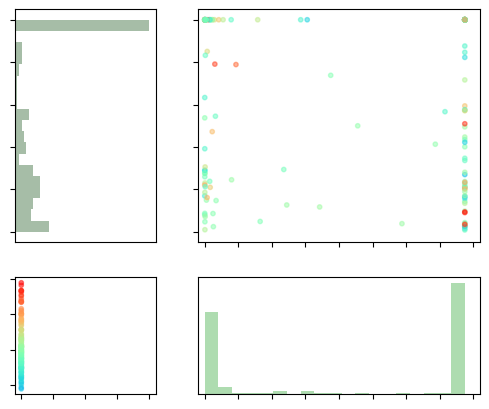

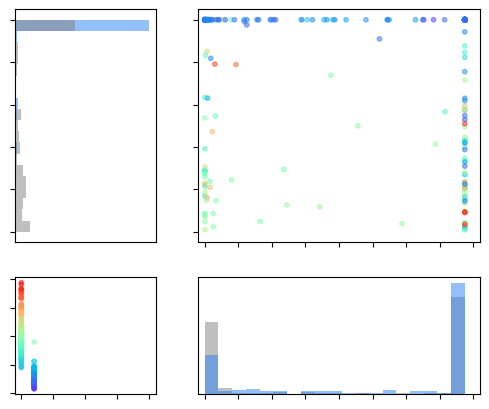

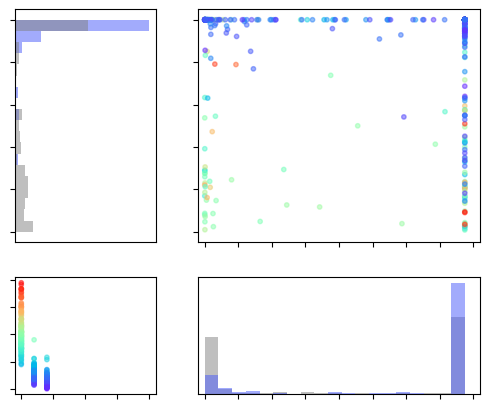

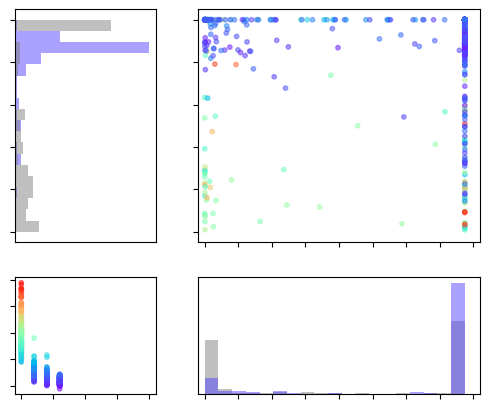

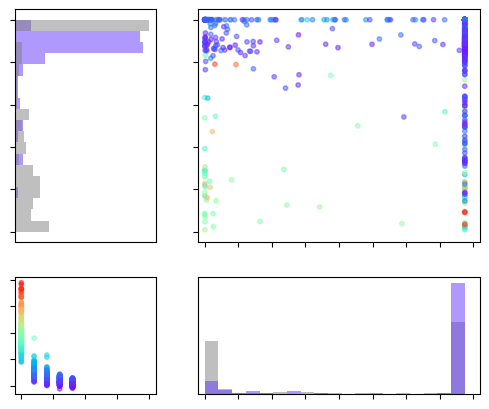

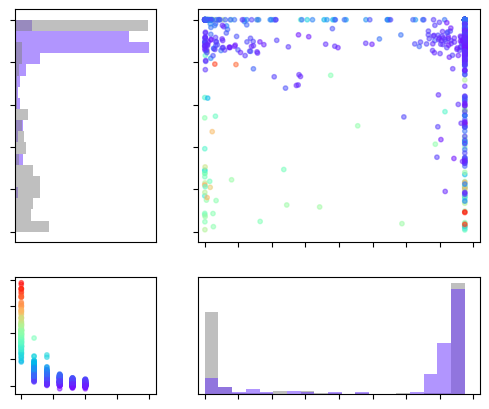

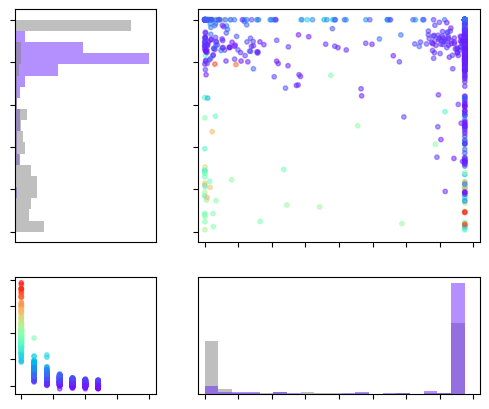

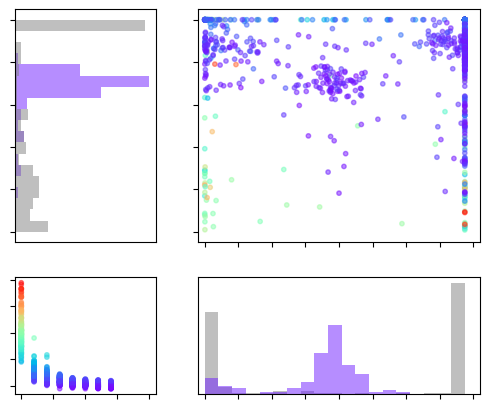

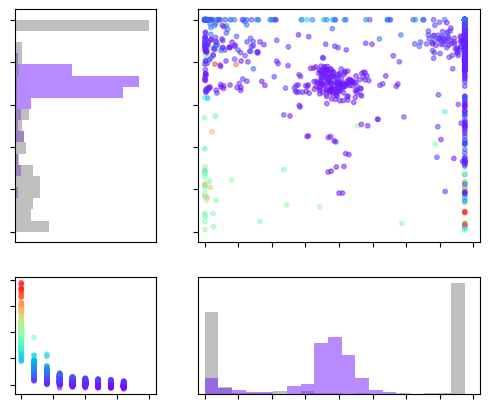

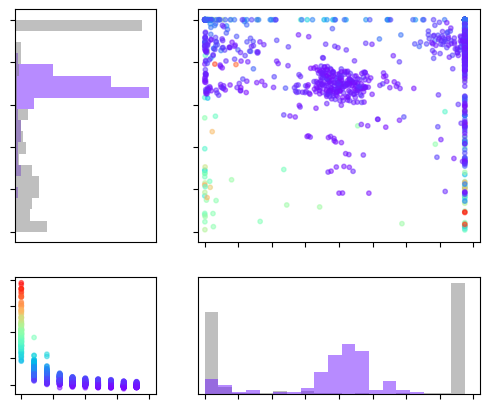

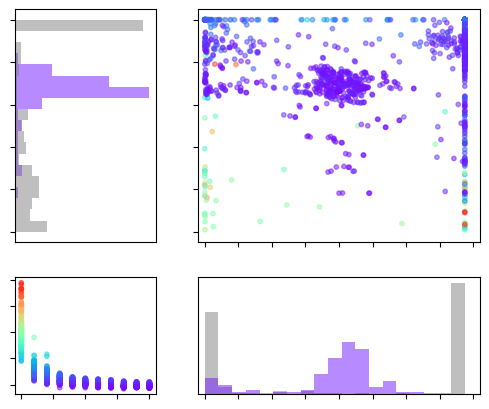

In [136]:
fidd = []
for fid in range(11):
    prior_df = pyemu.ParameterEnsemble.from_csv(
        pst=pst,filename=os.path.join(m_d,"animas_amrs_pp_rw_ies_init_zero.{0}.par.csv".format(0)))
    post_df = pyemu.ParameterEnsemble.from_csv(
        pst=pst,filename=os.path.join(m_d,"animas_amrs_pp_rw_ies_init_zero.{0}.par.csv".format(fid)))
    
    phi_vals = phi_df.loc[phi_df["iteration"]==fid, phi_df.columns[6:]]
    dff = pd.concat([phi_vals.T, post_df], axis=1)
    dff = dff.dropna(axis=0)
    
    fig, axes = plt.subplots(2,2,figsize=(6,5), gridspec_kw={'height_ratios': [2, 1], 'width_ratios': [1, 2]})
    axes[0,0].hist(post_df.loc[:, y_var].values,
            bins=np.linspace(
                sel_pars.loc[sel_pars["parnme"]==y_var, 'parlbnd'].values[0], 
                sel_pars.loc[sel_pars["parnme"]==y_var, 'parubnd'].values[0], 20),
            color=[rgba_vals[fid]], 
            alpha=0.5, density=True,
            label="Prior",
            orientation="horizontal",
            
    )
    axes[0,0].hist(prior_df.loc[:, y_var].values,
            bins=np.linspace(
                sel_pars.loc[sel_pars["parnme"]==y_var, 'parlbnd'].values[0], 
                sel_pars.loc[sel_pars["parnme"]==y_var, 'parubnd'].values[0], 20),
            color="gray", 
            alpha=0.5, density=True,
            label="Prior",
            orientation="horizontal",
    )
    
    fidd.append(fid)
    for fd in fidd:
        fd_df = pyemu.ParameterEnsemble.from_csv(
            pst=pst,filename=os.path.join(m_d,"animas_amrs_pp_rw_ies_init_zero.{0}.par.csv".format(fd)))

        phi_vals = phi_df.loc[phi_df["iteration"]==fd, phi_df.columns[6:]]
        dff = pd.concat([phi_vals.T, fd_df], axis=1)
        dff = dff.dropna(axis=0)        

        axes[0,1].scatter(
                dff.loc[:, x_var], dff.loc[:, y_var], label='Observed',
                c=dff.iloc[:, 0].tolist(),s=10,
                alpha=0.5,
                norm=norm, cmap=cm.rainbow
                )    

        axes[1, 0].scatter(
                [fd]* len(dff.iloc[:, 0].tolist()), dff.iloc[:, 0].tolist(),
                c=dff.iloc[:, 0].tolist(),s=10,
                alpha=0.5,
                norm=norm, cmap=cm.rainbow            
                    
        )
    axes[1,0].set_xlim(-0.5, 10.5)
#     axes[1,0].margins(x=0.1)
    axes[0,0].set_ylim(-5, 105)
    axes[0,1].set_xlim(-5, 205)
    axes[0,1].set_ylim(-5, 105)
    axes[1,1].set_xlim(-5, 205)
#     axes[1,1].margins(x=0.1)

    axes[1,1].hist(prior_df.loc[:, x_var].values,
            bins=np.linspace(
                sel_pars.loc[sel_pars["parnme"]==x_var, 'parlbnd'].values[0], 
                sel_pars.loc[sel_pars["parnme"]==x_var, 'parubnd'].values[0], 20),
            color="gray", 
            alpha=0.5, density=True,
            label="Prior"
    )

    axes[1,1].hist(post_df.loc[:, x_var].values,
            bins=np.linspace(
                sel_pars.loc[sel_pars["parnme"]==x_var, 'parlbnd'].values[0], 
                sel_pars.loc[sel_pars["parnme"]==x_var, 'parubnd'].values[0], 20),
            color=[rgba_vals[fid]], 
            alpha=0.5, density=True,
            label="Prior"
    )
    axes[0,0].set_xticks([])
    axes[1,1].set_yticks([])
    for ax in axes.flat:
        ax.tick_params(labelbottom=False, labelleft=False)
#     fig.tight_layout(pad=3)
    plt.savefig(os.path.join(m_d, 'phi{}.png'.format(fid)), dpi=300)
    fig.show()

In [114]:
[0]*10

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

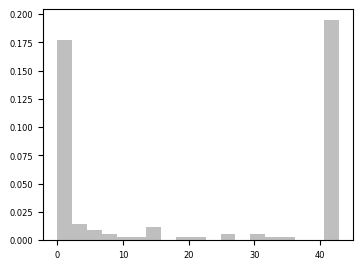

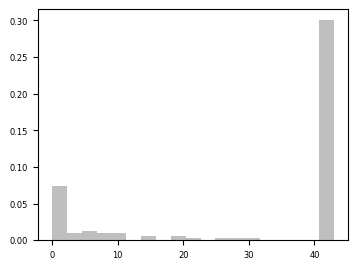

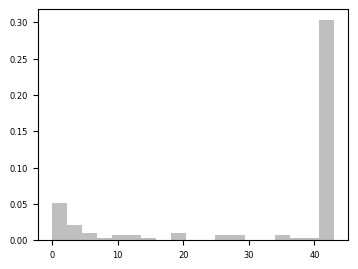

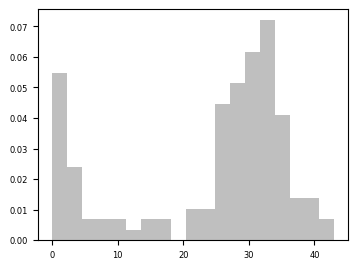

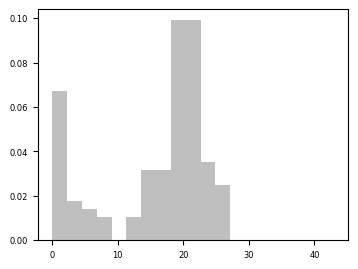

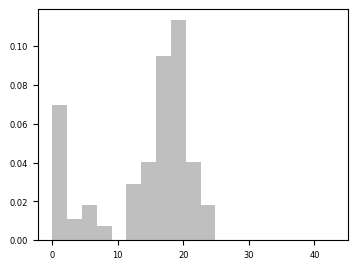

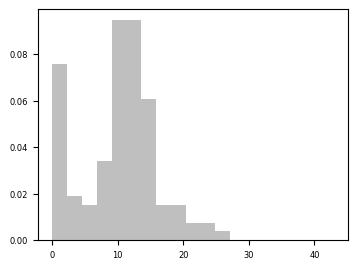

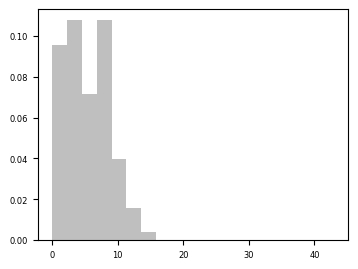

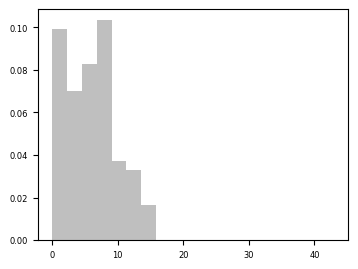

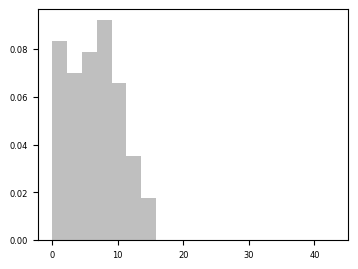

In [48]:

for i in range(10):
    fig, ax =plt.subplots(figsize=(4, 3))
    post_df = pyemu.ParameterEnsemble.from_csv(
        pst=pst,filename=os.path.join(m_d,"animas_amrs_pp_rw_ies_init_zero.{0}.par.csv".format(i)))
    
    
    colnam = "salt_mg019"
    ax.hist(post_df.loc[:, colnam].values,
            bins=np.linspace(
                sel_pars.loc[sel_pars["parnme"]==colnam, 'parlbnd'].values[0], 
                sel_pars.loc[sel_pars["parnme"]==colnam, 'parubnd'].values[0], 20),
            color = "gray", alpha=0.5, density=True,
            label="Prior"
    )
    plt.show()
    

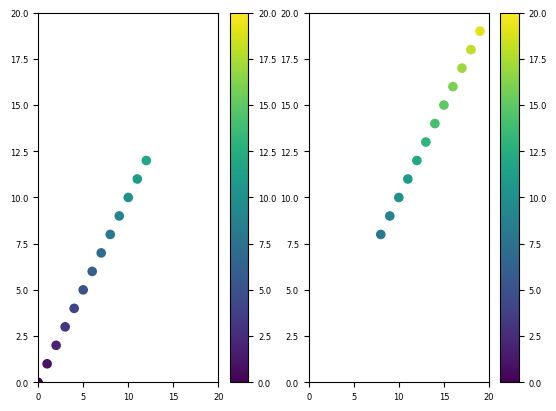

In [74]:
xyc = range(20)

plt.subplot(121)
plt.scatter(xyc[:13], xyc[:13], c=xyc[:13], s=35, vmin=0, vmax=20)
plt.colorbar()
plt.xlim(0, 20)
plt.ylim(0, 20)

plt.subplot(122)
plt.scatter(xyc[8:20], xyc[8:20], c=xyc[8:20], s=35, vmin=0, vmax=20, cmap=)   
plt.colorbar()
plt.xlim(0, 20)
plt.ylim(0, 20)

plt.show()